In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm, lognorm

# Parameters
n_samples = 10000  # Number of samples
mean = [0, 0]      # Mean vector for normal distribution
std_dev = [1, 1]   # Standard deviation for independent normal variables
rho = 0.7          # Correlation coefficient for dependent case


In [3]:
# Covariance matrices
cov_independent = np.diag(std_dev)  # Diagonal covariance matrix for independent case
cov_dependent = np.array([[1, rho], [rho, 1]])  # Covariance matrix for dependent case


In [5]:
# Generate normal random variables
norm_independent = np.random.multivariate_normal(mean, cov_independent, n_samples)
norm_dependent = np.random.multivariate_normal(mean, cov_dependent, n_samples)


In [7]:
# Transform to lognormal
lognorm_independent = np.exp(norm_independent)
lognorm_dependent = np.exp(norm_dependent)


In [9]:
# Create grids for surface plots
x1 = np.linspace(lognorm_independent[:, 0].min(), lognorm_independent[:, 0].max(), 100)
x2 = np.linspace(lognorm_independent[:, 1].min(), lognorm_independent[:, 1].max(), 100)
X1, X2 = np.meshgrid(x1, x2)


In [11]:
# Compute lognormal density for grid points
def lognormal_density(x, mean, std_dev):
    sigma = np.diag(std_dev)
    z = np.log(x) - mean
    inv_sigma = np.linalg.inv(sigma)
    density = np.exp(-0.5 * np.sum(z @ inv_sigma * z, axis=1)) / (x[:, 0] * x[:, 1] * np.sqrt((2 * np.pi) ** 2 * np.linalg.det(sigma)))
    return density.reshape(X1.shape)


In [13]:
pdf_independent = lognormal_density(np.vstack([X1.ravel(), X2.ravel()]).T, mean, std_dev).reshape(X1.shape)
pdf_dependent = lognormal_density(np.vstack([X1.ravel(), X2.ravel()]).T, mean, [1, 1]).reshape(X1.shape)


Text(0, 0.5, 'X2')

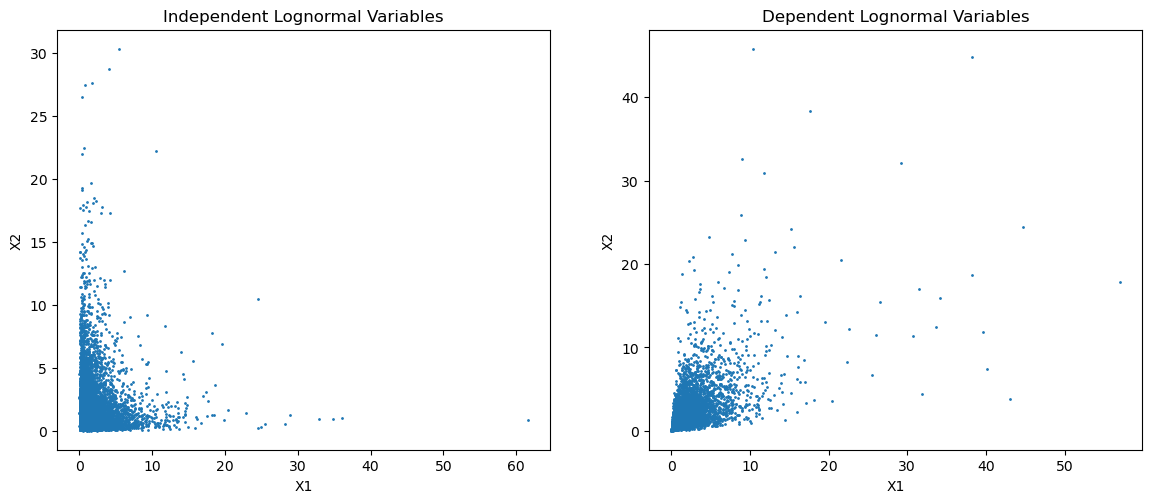

In [21]:
# Scatter plots
plt.figure(figsize=(14, 12))
plt.subplot(2, 2, 1)
plt.scatter(lognorm_independent[:, 0], lognorm_independent[:, 1], s=1)
plt.title('Independent Lognormal Variables')
plt.xlabel('X1')
plt.ylabel('X2')
plt.subplot(2, 2, 2)
plt.scatter(lognorm_dependent[:, 0], lognorm_dependent[:, 1], s=1)
plt.title('Dependent Lognormal Variables')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0.5, 0, 'Density')

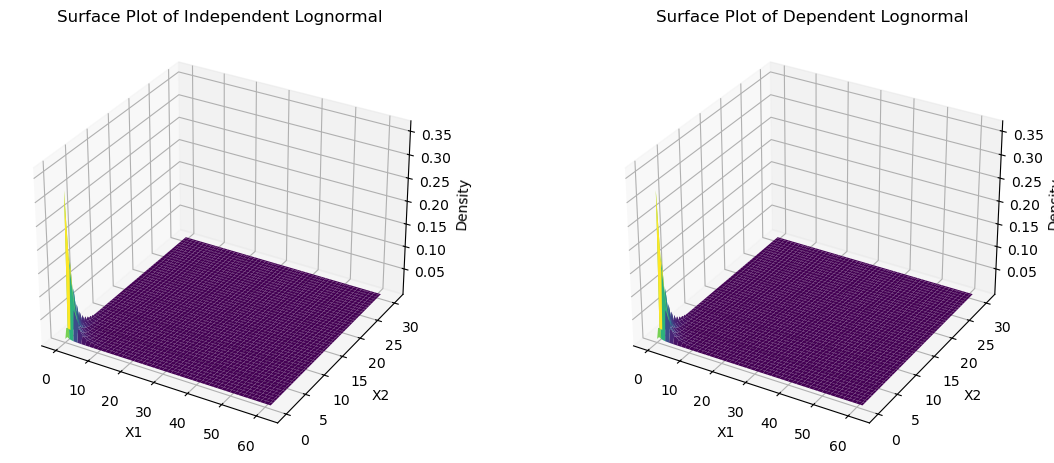

In [27]:
# Surface plots
plt.figure(figsize=(14, 12))
ax = plt.subplot(2, 2, 1, projection='3d')
ax.plot_surface(X1, X2, pdf_independent, cmap='viridis')
ax.set_title('Surface Plot of Independent Lognormal')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Density')
ax = plt.subplot(2, 2, 2, projection='3d')
ax.plot_surface(X1, X2, pdf_dependent, cmap='viridis')
ax.set_title('Surface Plot of Dependent Lognormal')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Density')